In [2]:
import random
from scipy.stats import laplace

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# define the parameters
m = 50
n = 100
k = 10000
eps = 1

In [8]:
# generate numbers from 1 to m
X = [random.randint(0,m) for i in range(n)]
print(X)

[32, 14, 44, 9, 10, 46, 5, 11, 15, 16, 20, 39, 2, 42, 40, 21, 17, 18, 35, 45, 29, 35, 4, 37, 13, 47, 44, 27, 8, 28, 35, 33, 43, 26, 27, 21, 44, 8, 12, 10, 36, 33, 20, 37, 2, 20, 9, 9, 30, 7, 11, 9, 25, 8, 39, 12, 41, 32, 4, 35, 32, 23, 24, 4, 11, 47, 11, 3, 1, 26, 29, 36, 8, 44, 42, 37, 7, 19, 8, 36, 3, 26, 47, 40, 32, 29, 42, 14, 11, 22, 22, 8, 13, 19, 15, 35, 28, 8, 21, 28]


In [5]:
# define the query
def query(x):
    return max(x)

In [6]:
ws = laplace.rvs(size=k)

In [7]:
zs = []
f = query(X)
for w in ws:
    z = f + ((2*m)/(n*eps)) * w
    zs.append(z)


49


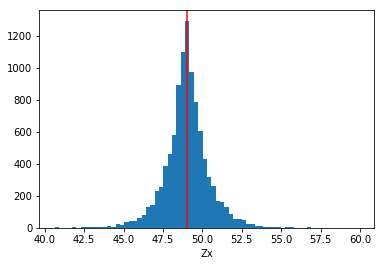

In [33]:
plt.hist(zs, bins=70) 
plt.axvline(x=f, color='red')
plt.xlabel('Zx');
print(f)

In [12]:
def cardinality(x, z):
    s = 0
    for xi in x:
        if xi > z:
            s += 1
    return s
    
def inverse(x, z):
    if z > f:
        return 1
    if z == f:
        return 0
    else:
        return cardinality(x, z)

In [9]:
def pmf(x, z, f, values):
    s = 0
    eps2 = (-1)*eps/2
    for u in values:
        s += np.exp(eps2 * inverse(x, u))
    
    return np.exp(eps2 * inverse(x, z)) / s

Text(0.5, 0, 'F')

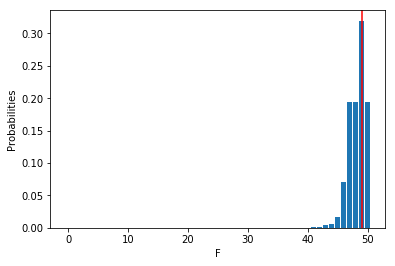

In [34]:
prob = []
values = range(0,m+1)
for i in values:
    prob.append(pmf(X, i, f, values))

plt.bar(values, prob) 
plt.axvline(x=f, color='red')
plt.ylabel('Probabilities')
plt.xlabel('F')